<a href="https://colab.research.google.com/github/aalling93/syntese/blob/master/notebook/testing_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tf-nightly
#!pip install geopandas
#!pip install rasterio
#!pip install contextily
#!pip install sentinelsat

## Using the CNN

This notebook gives a short introduction in using the devloped ECNN. If problem arises due to e.g. function calls it is suggested to use google colab. Often, dependency problem arisis with the usage of Keras with other libraries.

--------------------------
First, loading the my_cnn library.


Then, checking the version of tensorflow. It is important that is is developer version, i.g. it should have dev in it's name.
The version used in this project is 2.3.0-dev20200529

In [4]:
import tensorflow as tf
print(tf.__version__)
import my_cnn as cnn
import warnings
warnings.filterwarnings("ignore")

2.4.0-dev20200724


Using TensorFlow backend.


To get a fire probability, the function cnn.predictions_folder() is used. 

In [5]:
help(cnn.predictions_folder)  

Help on function predictions_folder in module my_cnn:

predictions_folder(folder_images='/content/drive/My Drive/syntese/data/cnn/images_testing', Folder_models='/content/drive/My Drive/syntese/data/cnn/models/new', Verbose=0)
    cnn.predictions_folder()
    
    This function is used to predict fires in many image pairs.
    
    The function takes a path to a folder. In this folder, N image pair folders exists. The function will the find the probability for no fires in each image pair using the cnn.prediction_image() fucntion.
    
    Input:
        folder_images[str]: String of the folder with many image pair folders.
        Folder_models[str]: String of the flder with the many model folders.
        Verbose[int]: Interger deciding the amount of information given. if 0 no info is given. if 1, info will be printed.
        
    Output:
        prediction_maps[list]: List of prediction masks for each image pair.
        extent[list]: Geographic extent of prediction masks. Used for 

In [7]:
prediction_masks, ex = cnn.predictions_folder(folder_images='/content/drive/My Drive/syntese/data/cnn/images_testing/',Folder_models='/content/drive/My Drive/syntese/data/cnn/models/',Verbose=1)

2  Image pairs found

 -----------------------------
 Getting prediction for image pair:  1 
 -----------------------------

Fire Detection maps are being calculated:


there are: 2  . tif  files in folder
--------------------------
Sentinel-1 image is loading

1 image is being loaded
image 1
There are 3 bands

 Making predictions for model 1

 Making predictions for model 2

 Making predictions for model 3

 Making predictions for model 4

 Making predictions for model 5

 Making predictions for the ECNN
(get_predictions): A fire has been located
--- 268.1415231227875 seconds spent ---

 -----------------------------
 Getting prediction for image pair:  2 
 -----------------------------

Fire Detection maps are being calculated:


there are: 2  . tif  files in folder
--------------------------
Sentinel-1 image is loading

1 image is being loaded
image 1
There are 2 bands

 Making predictions for model 1

 Making predictions for model 2

 Making predictions for model 3

 Making predict

### Showing the predictions.

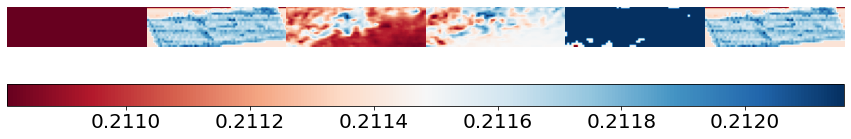

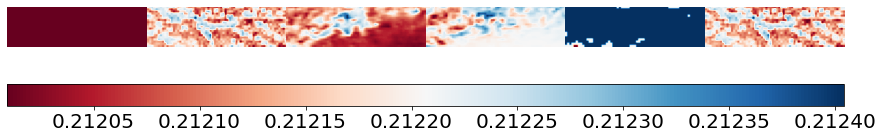

In [10]:
from matplotlib import pyplot as plt
########## For first image pair #####################
fig, axs = plt.subplots(1,6, figsize=(15, 6), facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(len(prediction_masks[0])):
    im = axs[i].imshow(prediction_masks[0][i][:,:,1],cmap='RdBu')
    axs[i].set_aspect("equal")
    axs[i].axis('off')
p0 = axs[0].get_position().get_points().flatten()
p5 = axs[5].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.32, p5[2]-p0[0], 0.05])
cbar = plt.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=20) 
plt.show()
########## For second image pair #####################
fig, axs = plt.subplots(1,6, figsize=(15, 6), facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(len(prediction_masks[1])):
    im = axs[i].imshow(prediction_masks[1][i][:,:,1],cmap='RdBu')
    axs[i].set_aspect("equal")
    axs[i].axis('off')
p0 = axs[0].get_position().get_points().flatten()
p5 = axs[5].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.32, p5[2]-p0[0], 0.05])
cbar = plt.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=20) 
plt.show()


In the first image, we can see that the Sentinel-1 and Sentinel-3 imaget arent collocated properly.